## Loan Eligibility Prediction using Classfication

### Import Libraries

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Load Data

In [152]:
df=pd.read_csv('Loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

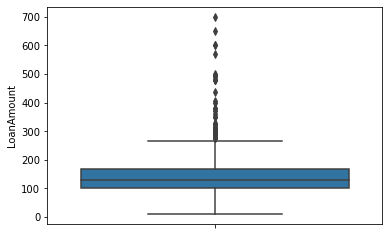

In [7]:
sns.boxplot('LoanAmount',data=df,orient='v')

C:\Users\Navaneeth Krishnan\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Navaneeth Krishnan\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  7., 14., 17., 32., 32., 68., 74., 88., 48., 52., 22., 44.,
        14., 11.,  6.,  6.,  7.,  9.,  5.,  4.,  5.,  3.,  1.,  2.,  1.,
         3.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  4.,  3.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  9.  ,  22.82,  36.64,  50.46,  64.28,  78.1 ,  91.92, 105.74,
        119.56, 133.38, 147.2 , 161.02, 174.84, 188.66, 202.48, 216.3 ,
        230.12, 243.94, 257.76, 271.58, 285.4 , 299.22, 313.04, 326.86,
        340.68, 354.5 , 368.32, 382.14, 395.96, 409.78, 423.6 , 437.42,
        451.24, 465.06, 478.88, 492.7 , 506.52, 520.34, 534.16, 547.98,
        561.8 , 575.62, 589.44, 603.26, 617.08, 630.9 , 644.72, 658.54,
        672.36, 686.18, 700.  ]),
 <a list of 50 Patch objects>)

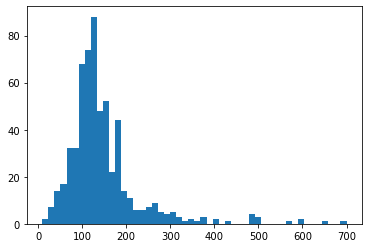

In [9]:
plt.hist("LoanAmount",bins=50,data=df)

In [10]:
df1=df

In [11]:
df1['LoanAmount']=df1['LoanAmount'].fillna(df['LoanAmount'].mean())
df1['Credit_History']=df1['Credit_History'].fillna(df['Credit_History'].mean())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [12]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.LoanAmount.mean()

146.41216216216213

In [14]:
df.Loan_Amount_Term.mean()

342.0

In [15]:
df.LoanAmount.mode()

0    146.412162
dtype: float64

In [16]:
df.LoanAmount.median

<bound method Series.median of 0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64>

In [19]:
df1.LoanAmount.mean()

146.41216216216213

In [20]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [21]:
df.Credit_History.unique()

array([1.        , 0.        , 0.84219858])

In [22]:
df.Gender.mode()

0    Male
dtype: object

In [23]:

df1.Married.mode()

0    Yes
dtype: object

In [24]:
df1.Dependents.mode()

0    0
dtype: object

In [25]:
df1.Self_Employed.mode()

0    No
dtype: object

In [26]:
df1['Gender']=df1['Gender'].fillna(df['Gender'].mode()[0])
df1['Married']=df1['Married'].fillna(df['Married'].mode()[0])
df1['Dependents']=df1['Dependents'].fillna(df['Dependents'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [27]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
#total income
df1['Total_Income']=df1['ApplicantIncome']+df1['CoapplicantIncome']
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


### Exploratary Data Analysis

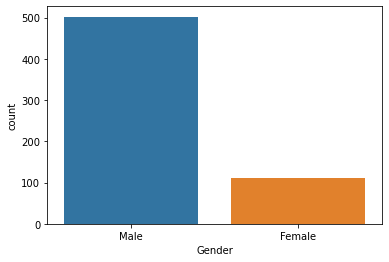

In [29]:
sns.countplot('Gender',data=df1)

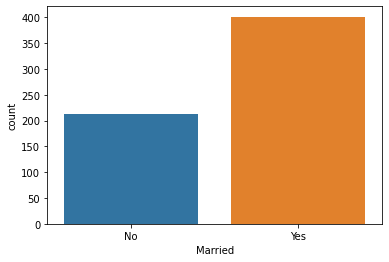

In [30]:
sns.countplot('Married',data=df1)


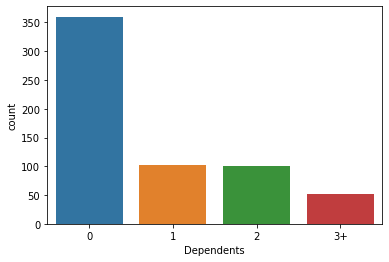

In [31]:
sns.countplot('Dependents',data=df1)


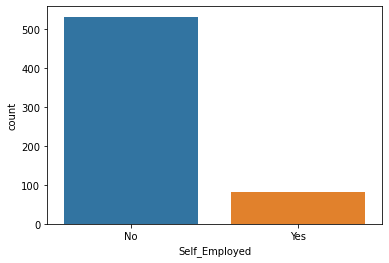

In [32]:
sns.countplot('Self_Employed',data=df1)


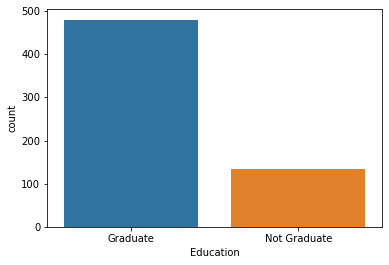

In [33]:
sns.countplot('Education',data=df1)

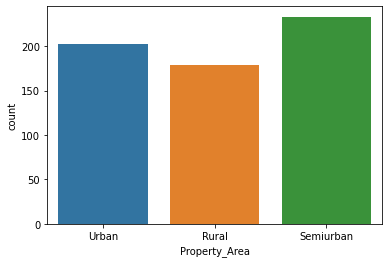

In [34]:
sns.countplot('Property_Area',data=df1)

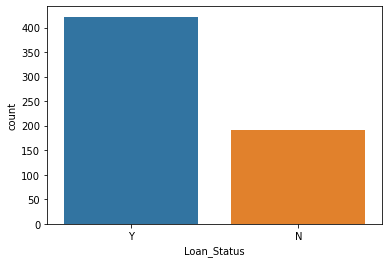

In [35]:
sns.countplot('Loan_Status',data=df)

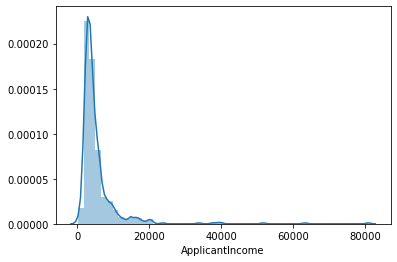

In [36]:
sns.distplot(df1['ApplicantIncome'])  # Left Skew (Log Transformation, minmax, normaliation)

In [37]:
# Apply log transformation
df1['ApplicantIncomeLog']=np.log(df1['ApplicantIncome'])

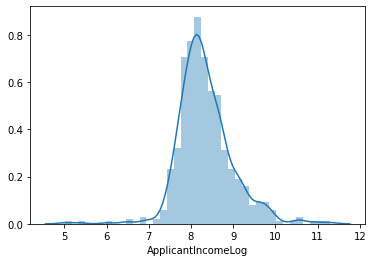

In [38]:
sns.distplot(df1['ApplicantIncomeLog']) 

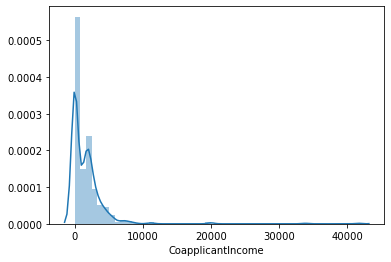

In [39]:
sns.distplot(df1["CoapplicantIncome"])

In [40]:
# Apply log transformation
df1['CoapplicantIncomeLog']=np.log(df1['CoapplicantIncome'])

C:\Users\Navaneeth Krishnan\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


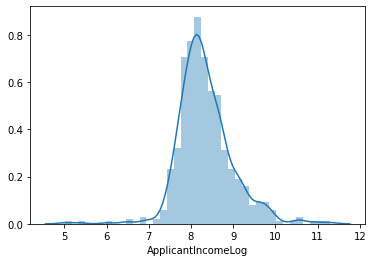

In [41]:
sns.distplot(df1['ApplicantIncomeLog']) 

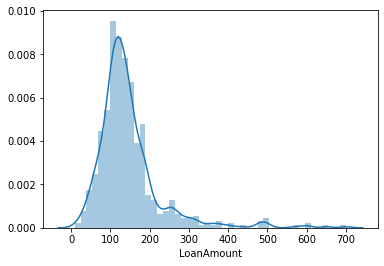

In [42]:
sns.distplot(df1['LoanAmount'])

In [43]:
# Apply log transformation
df1['LoanAmountLog']=np.log(df1['LoanAmount'])

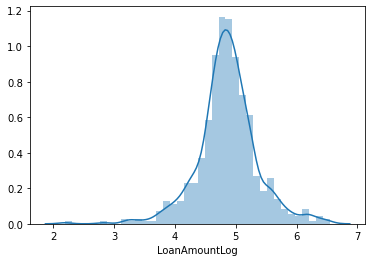

In [44]:
sns.distplot(df1['LoanAmountLog']) 

C:\Users\Navaneeth Krishnan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


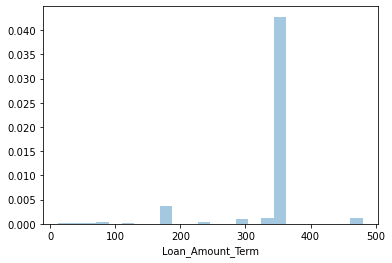

In [45]:
sns.distplot(df1['Loan_Amount_Term'])

In [46]:
# Apply log transformation
df1['Loan_Amount_TermLog']=np.log(df1['Loan_Amount_Term'])

C:\Users\Navaneeth Krishnan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


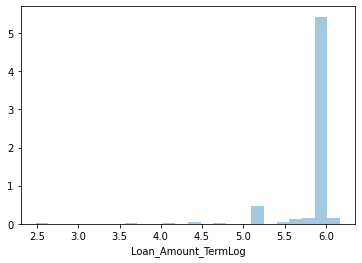

In [47]:
sns.distplot(df1['Loan_Amount_TermLog'])

C:\Users\Navaneeth Krishnan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


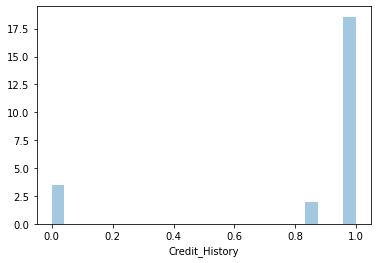

In [48]:
sns.distplot(df1['Credit_History'])

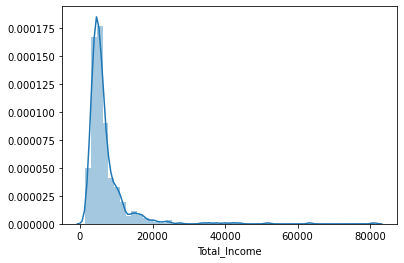

In [49]:
sns.distplot(df1['Total_Income'])

In [50]:
# Apply log transformation
df1['Total_IncomeLog']=np.log(df1['Total_Income'])

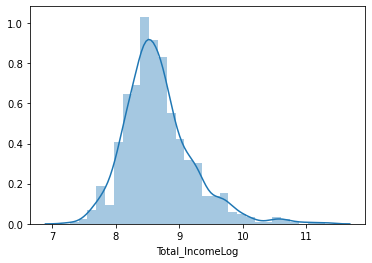

In [51]:
sns.distplot(df1['Total_IncomeLog'])

### Correlation

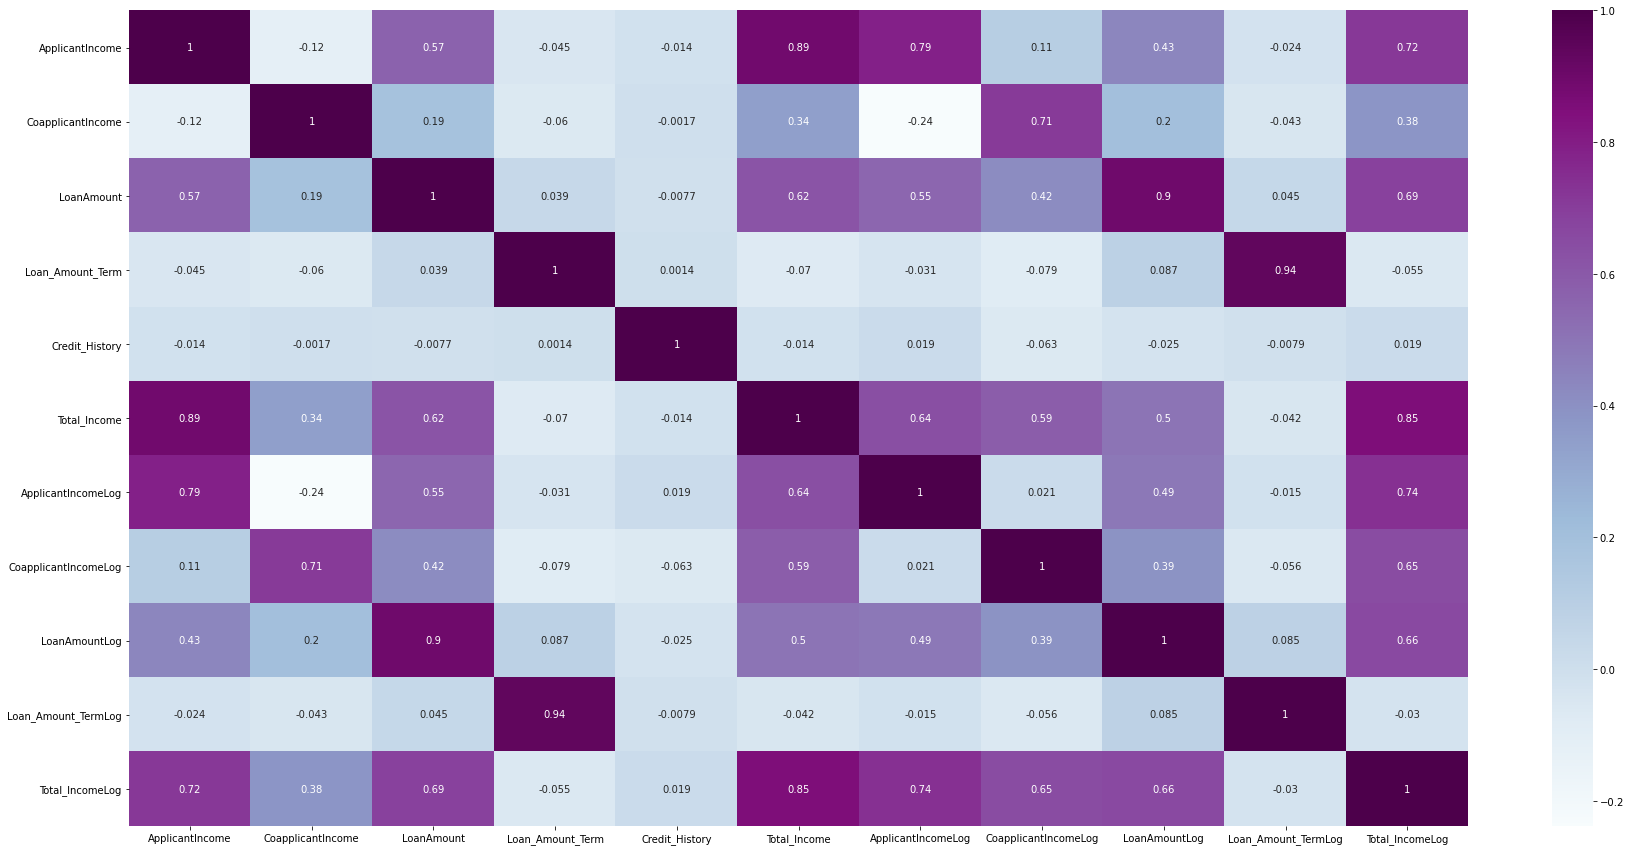

In [52]:
corr=df1.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True,cmap='BuPu')


In [53]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [54]:
#drop unwanted column
cols=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','CoapplicantIncomeLog']
df1=df1.drop(columns=cols,axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


### Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for col in cols:
    df1[col]=le.fit_transform(df1[col])

In [56]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


In [57]:
X=df1.drop(columns=['Loan_Status'],axis=1)
y=df1['Loan_Status']

### Train-Test Split

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=365)

### Model Training

In [133]:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=365)
    model.fit(X_train,y_train)
    print("Accuracy is",model.score(X_test,y_test)*100)
    score= cross_val_score(model,X,y,cv=5)
    print("Cross validation is",np.mean(score)*100)

### Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
classify(model,X,y)

Accuracy is 82.92682926829268
Cross validation is 80.9462881514061


### Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 73.17073170731707
Cross validation is 71.01026256164201


###  Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model =RandomForestClassifier()
classify(model,X,y)

Accuracy is 81.30081300813008
Cross validation is 78.66853258696523


In [137]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 79.67479674796748
Cross validation is 76.87991470078636


### Hyperparameter tuning RandomForest

In [138]:
model =RandomForestClassifier(n_estimators=130,min_samples_split=15,max_depth=7,max_features=1)
classify(model,X,y)

Accuracy is 81.30081300813008
Cross validation is 80.78368652538984


### Confusion Matrix

In [139]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[21, 22],
       [ 1, 79]], dtype=int64)

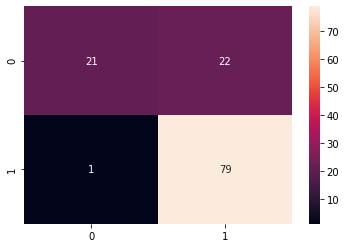

In [140]:
sns.heatmap(cm, annot=True)

In [141]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
556,0,0,0,0,0,0.842199,2,7.888710,4.430817,5.886104,8.364508
597,1,0,0,0,0,0.000000,1,8.002025,4.477337,5.886104,8.002025
486,1,0,2,0,0,0.000000,0,8.173857,4.382027,5.886104,8.173857
437,1,1,0,0,0,1.000000,2,7.702104,4.986426,5.886104,8.113127
322,1,1,2,1,0,1.000000,0,8.188967,4.986426,5.886104,8.554682
...,...,...,...,...,...,...,...,...,...,...,...
539,1,1,3,0,0,1.000000,0,8.766706,5.056246,5.192957,8.766706
284,1,1,0,0,0,1.000000,0,9.936294,4.986426,5.886104,9.936294
581,1,0,0,0,0,1.000000,2,7.515345,4.499810,5.886104,10.482149
519,0,0,0,1,0,1.000000,0,8.131531,4.553877,5.886104,8.131531


In [142]:
y_test

556    1
597    0
486    0
437    1
322    1
      ..
539    1
284    0
581    0
519    0
608    1
Name: Loan_Status, Length: 123, dtype: int32

### Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [144]:
y_pred=NBClassifier.predict(X_test)

In [145]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [149]:
from sklearn import metrics
print('The accuracy of Naive Bayes is : ', metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is :  0.8211382113821138
